In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# reading the data from the data file
df = pd.read_excel('datathon.xlsx')
# takes rows with null values and gets rid of the line of data
df.dropna(inplace=True)
# excluding the irrelevant data columns
columns_to_exclude = ["Timestamp", "What is your major?", "What is your GPA?"]
df = df.drop(columns=columns_to_exclude)
# print(df) # to see the data

# standardizing the data for normal distribution
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

#PCA stuff
pca = PCA(n_components=2)  # Adjust the number of components as needed
principal_components = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_


[[-0.46816111 -0.49957393 -0.49380801  0.0434366  -0.42116523 -0.32884315]
 [ 0.07036006  0.18112628  0.23568677  0.87202552 -0.33401578 -0.1862778 ]]


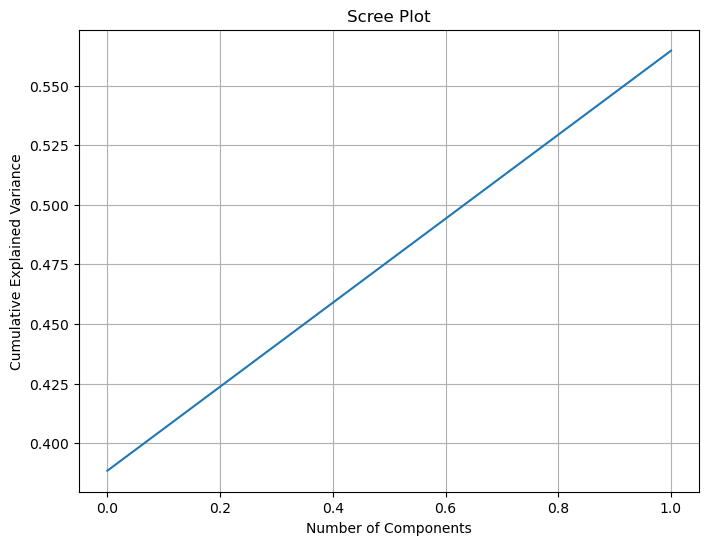

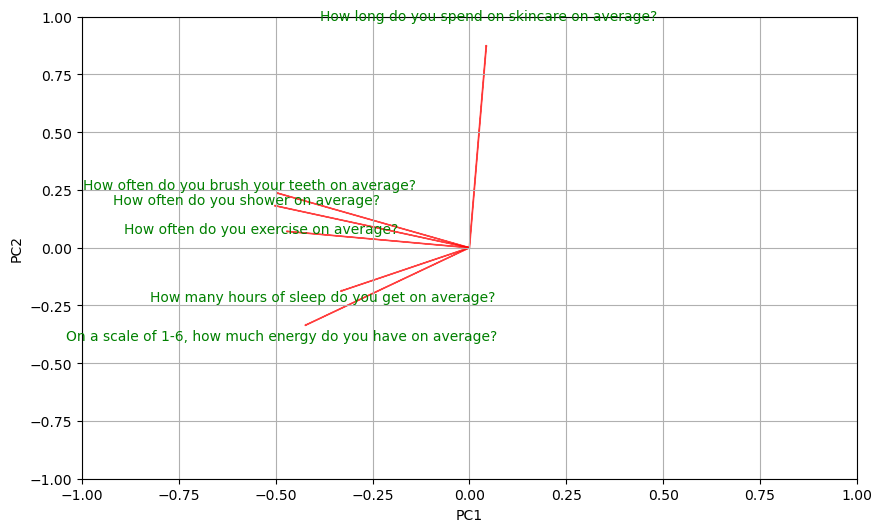

In [13]:

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 6))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.7)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

biplot(principal_components, np.transpose(pca.components_), labels=df.columns)  # Assuming X has column labels
plt.show()

In [41]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_
print(pca.components_)

[[-0.46816111 -0.49957393 -0.49380801  0.0434366  -0.42116523 -0.32884315]
 [ 0.07036006  0.18112628  0.23568677  0.87202552 -0.33401578 -0.1862778 ]]


[[-0.46816111 -0.49957393 -0.49380801  0.0434366  -0.42116523 -0.32884315]
 [ 0.07036006  0.18112628  0.23568677  0.87202552 -0.33401578 -0.1862778 ]]
[0.3884501  0.17615625]


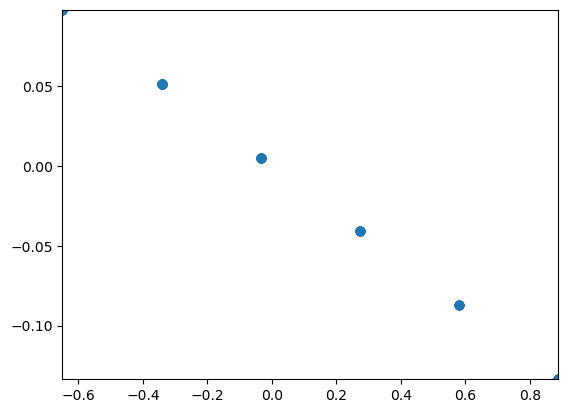

In [40]:
PC1_list = []
PC2_list = []

pca = PCA(n_components = 2)
principal_components = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_
print(pca.components_)

for i in range(len(scaled_data)):
    PC1 = pca.components_[0][0]*scaled_data[i][0] 
    + pca.components_[0][1]*scaled_data[i][1] 
    + pca.components_[0][2]*scaled_data[i][2]
    + pca.components_[0][3]*scaled_data[i][3]
    + pca.components_[0][4]*scaled_data[i][4]
    + pca.components_[0][5]*scaled_data[i][5]
    
    PC2=pca.components_[1][0]*scaled_data[i][0] 
    + pca.components_[1][1]*scaled_data[i][1] 
    + pca.components_[1][2]*scaled_data[i][2]
    + pca.components_[1][3]*scaled_data[i][3]
    + pca.components_[1][4]*scaled_data[i][4]
    + pca.components_[1][5]*scaled_data[i][5]
    
    PC1_list.append(PC1)
    PC2_list.append(PC2)

min_1 = min(PC1_list)
min_2 = min(PC2_list)
max_1 = max(PC1_list)
max_2 = max(PC2_list)
plt.xlim(min_1, max_1)
plt.ylim(min_2, max_2)

print(explained_variance)
plt.scatter(PC1_list, PC2_list)
plt.show()